Load libraries and dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


## Loding dataset

In [25]:
df_raw = pd.read_csv("../data/raw/Cereal_crops.csv")
df_raw.head()

#removing unamed column
# Clean data
df_clean = df_raw.loc[:, ~df_raw.columns.str.contains('^Unnamed')]

# Save cleaned version to 'processed/' folder
df_clean.to_csv('../data/processed/crop_clean.csv', index=False)

# 4. Use cleaned version going forward
df = pd.read_csv('../data/processed/crop_clean.csv')
df.head()

,No.,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Crop Type,Crop Species,Yield (q/ha)
0,1.0,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,730-1300,1750-2500,98-112,Teff,Acc 236756-3 (Bir Adama),16-18
1,2.0,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,700-1300,1700-2600,104-128,Teff,DZ-Cr-551 RIL173 (Bereket),2.0-2.7
2,3.0,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,700-1300,1700-2600,115-130,Teff,DZ-Cr-542 RIL106 (Kulie),2.0-2.3
3,4.0,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,1800-200,1750-2250,111-128,Teff,DZ-Cr-456 RIL76B (Jarso),2.3
4,5.0,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,800-1300,1700-2400,93-113,Teff,DZ-Cr-459 RIL 104 (Takusa),17-21


## Basic dataset inspection

In [26]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No.           288 non-null    float64
 1   N (kg/ha)     288 non-null    str    
 2   P (kg/ha)     288 non-null    str    
 3   K (kg/ha)     288 non-null    str    
 4   T (°C)        288 non-null    str    
 5   PH            288 non-null    str    
 6   RF (mm)       288 non-null    str    
 7   Altitude (m)  288 non-null    str    
 8   LGP           288 non-null    str    
 9   Crop Type     288 non-null    str    
 10  Crop Species  288 non-null    str    
 11  Yield (q/ha)  288 non-null    str    
dtypes: float64(1), str(11)
memory usage: 117.8 KB


,No.
count,288.000000
mean,144.500000
std,83.282651
min,1.000000
25%,72.750000
50%,144.500000
75%,216.250000
max,288.000000


In [27]:
range_columns = [
    "N (kg/ha)", "P (kg/ha)", "K (kg/ha)", "T (°C)",
    "PH", "RF (mm)", "Altitude (m)", "LGP", "Yield (q/ha)"
]

categorical_columns = [
    "Crop Type", "Crop Species"
]

df[range_columns + categorical_columns].head()


,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Yield (q/ha),Crop Type,Crop Species
0,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,730-1300,1750-2500,98-112,16-18,Teff,Acc 236756-3 (Bir Adama)
1,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,700-1300,1700-2600,104-128,2.0-2.7,Teff,DZ-Cr-551 RIL173 (Bereket)
2,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,700-1300,1700-2600,115-130,2.0-2.3,Teff,DZ-Cr-542 RIL106 (Kulie)
3,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,1800-200,1750-2250,111-128,2.3,Teff,DZ-Cr-456 RIL76B (Jarso)
4,69 - 92,10 - 30,15 - 30,10 - 27,5.5 - 7.0,800-1300,1700-2400,93-113,17-21,Teff,DZ-Cr-459 RIL 104 (Takusa)


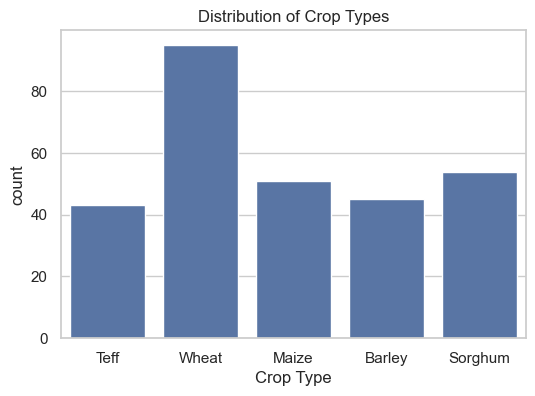

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Crop Type")
plt.title("Distribution of Crop Types")
plt.show()


In [29]:
def range_midpoint(value):
    if isinstance(value, str) and "-" in value:
        low, high = value.replace(" ", "").split("-")
        return (float(low) + float(high)) / 2
    return np.nan

df_mid = df.copy()

for col in range_columns:
    df_mid[col] = df[col].apply(range_midpoint)

df_mid[range_columns].head()


ValueError: too many values to unpack (expected 2)

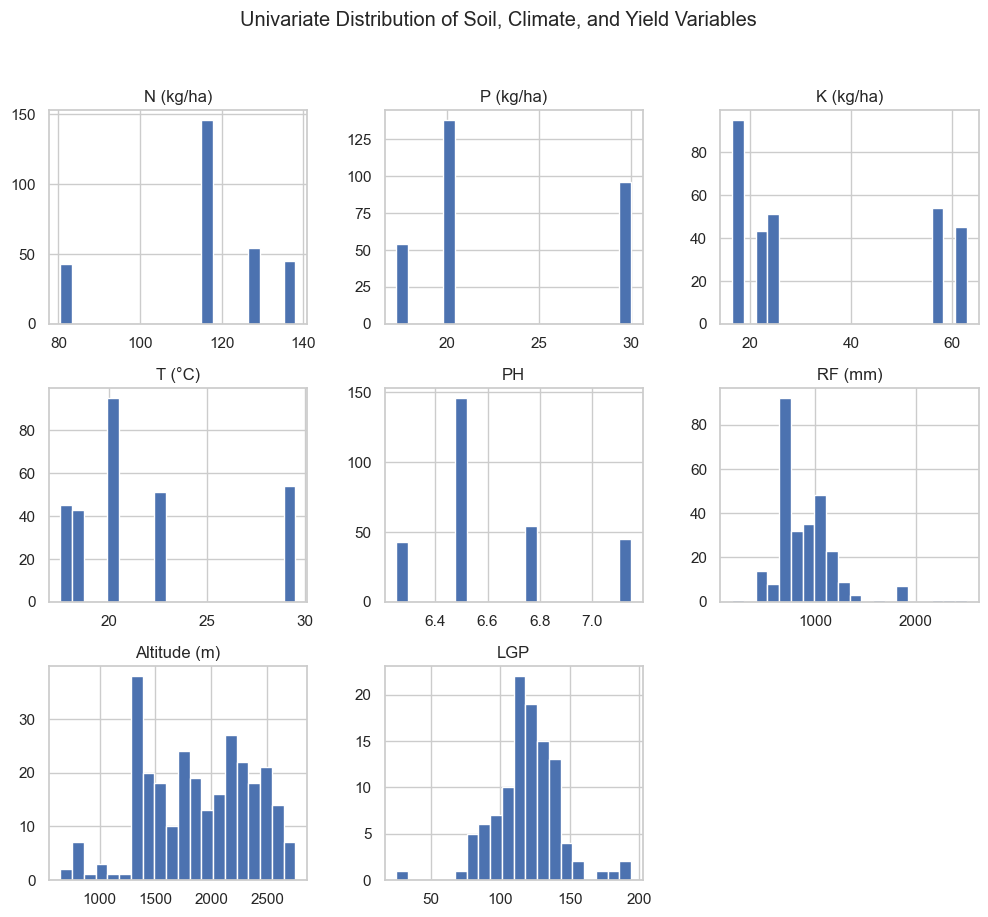

In [30]:
df_mid[range_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle("Univariate Distribution of Soil, Climate, and Yield Variables")
plt.show()


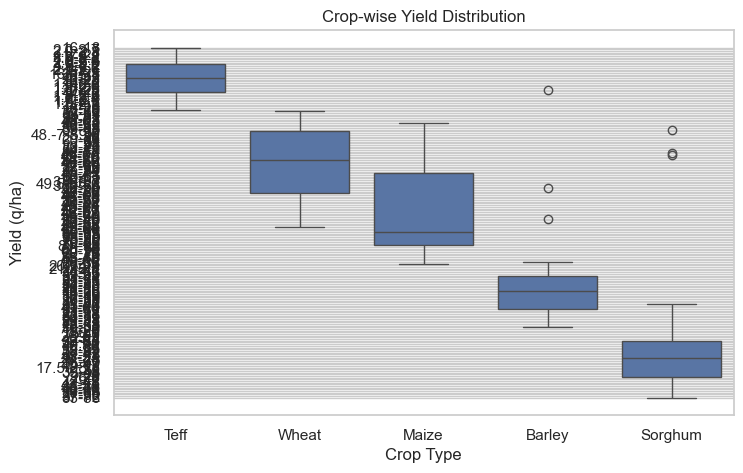

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_mid, x="Crop Type", y="Yield (q/ha)")
plt.title("Crop-wise Yield Distribution")
plt.show()


In [32]:
corr = df_mid[range_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Soil, Climate, and Yield")
plt.show()



ValueError: could not convert string to float: '16-18'

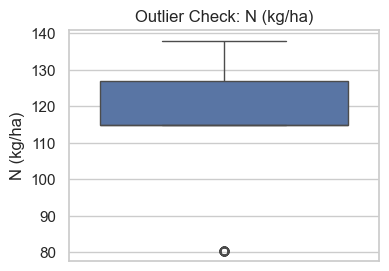

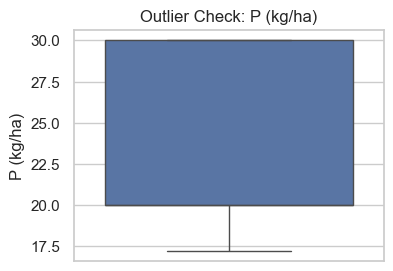

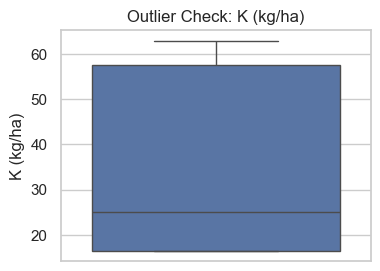

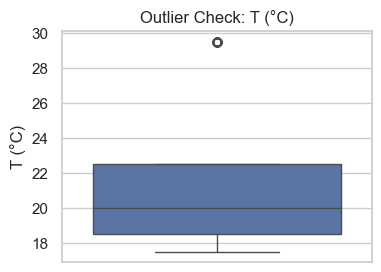

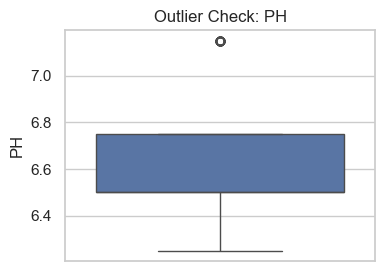

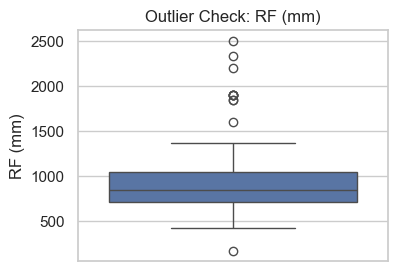

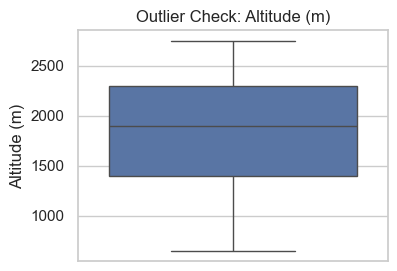

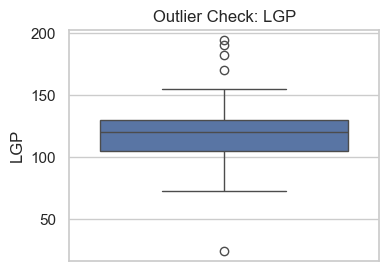

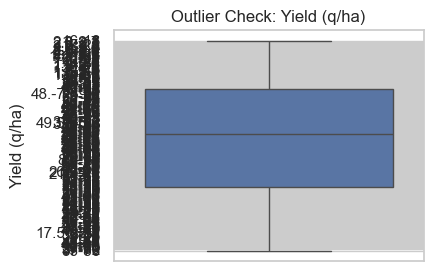

In [33]:
for col in range_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=df_mid[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()
